## Importing Libraries and Populating the interactive namespace


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Fourier Coefficients

In [8]:
def fourier_coeff(zvals, m):    
    num_pts = shape(zvals)[0]  
    t_values = linspace(0,1,num_pts+1)[1:]    
    c_m_values = 1.0/num_pts * np.sum( zvals * np.exp(-2*pi*1j*m*t_values) )    
    return c_m_values

## Computing Fourier Dictionary

In [7]:
def compute_Fourier_dict( zvals, num_maximum ):
    required_dictionary = {}
    for m in range(-1*num_maximum,num_maximum+1):
        c_m_values = fourier_coeff(zvals[:-1],m)
        required_dictionary[m] = c_m_values
    return required_dictionary;


## Reconstructing Fourier Dictionary

In [6]:
def reconstruct_Fourier_dict( fourier_dict ):
    z_vals = zeros(100, dtype = complex)
    t_values= linspace(0,1,101)[1:]
    for key in fourier_dict.keys():
        z_vals += fourier_dict[key] * np.exp(2*pi*1j*key*t_values)
    plot(z_vals.real, z_vals.imag, ".")
    xlabel("m -->")
    ylabel("Real ( C(m) ) -->")

## Drawing the shape $\pi$ using the fourier reconstruction function

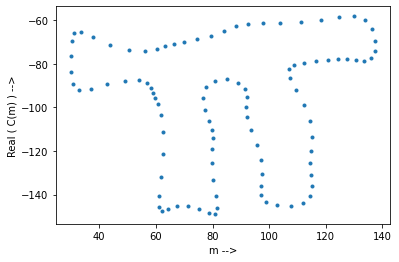

In [12]:
'''loading the pi.dat into a variable'''
pi_shape_text = loadtxt('pi.dat')
'''iterating through the text'''
pi_shape_text = pi_shape_text[:,0] + 1j*pi_shape_text[:,1]
'''calling the reconstruct funtion'''
reconstruct_Fourier_dict(compute_Fourier_dict(pi_shape_text, 15))

## Drawing "stones" using the Fourier Reconstruction function

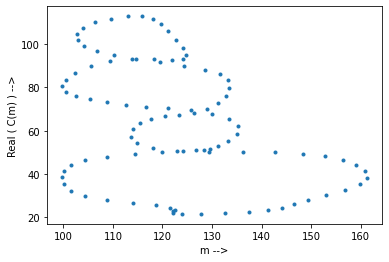

In [13]:
stone_text = loadtxt('stones.dat')

stone_text = stone_text[:,0] + 1j*stone_text[:,1]

reconstruct_Fourier_dict(compute_Fourier_dict(stone_text, 15))

## Drawing custom shapes using the Fourier Reconstruction function
We have made a `blob.svg` in inkscape and we have converted to a `.dat` file using the script:
```sh
grep -v 'inkscape' vars.svg | grep -e cx -e cy | sed -e 's/"//g' -e 's/cx=//g' -e 's/cy=//g' -e 's/\/>//g'  | awk '{++i; printf $1; printf " "; if (i%2==0) printf "\n"}' > coord.dat
```


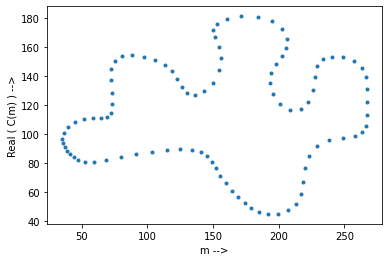

In [14]:
blob_shape = loadtxt('coord.dat')

blob_shape = blob_shape[:,0] + 1j*blob_shape[:,1]

reconstruct_Fourier_dict(compute_Fourier_dict(blob_shape, 15))

## Note
We can make the shapes using the `reshape` function too, this will allow us to compare the achieved and required figure.